In [1]:
import sys
sys.path.append('../pestools')
import matplotlib.pyplot as plt
import matplotlib as mpl
from identpar import IdentPar

% matplotlib inline

In [2]:
mpl.rcParams['font.family'] = 'Arial'

###Identifiability bar chart
co using Jeremy's errvar class in pyemu


In [3]:
ip = IdentPar('../cc/columbia.jco')

2015-03-31 16:33:58.222143 starting: pre-loading base components
2015-03-31 16:33:58.222224 starting: loading jco: ../cc/columbia.jco
2015-03-31 16:33:58.270313 finished: loading jco: ../cc/columbia.jco took: 0:00:00.048089
2015-03-31 16:33:58.270365 starting: loading pst: ../cc/columbia.pst
2015-03-31 16:33:58.304602 finished: loading pst: ../cc/columbia.pst took: 0:00:00.034237
2015-03-31 16:33:58.304969 starting: loading parcov
2015-03-31 16:33:58.394150 finished: loading parcov took: 0:00:00.089181
2015-03-31 16:33:58.394517 starting: loading obscov
2015-03-31 16:33:58.755218 finished: loading obscov took: 0:00:00.360701
2015-03-31 16:33:58.755620 finished: pre-loading base components took: 0:00:00.533477


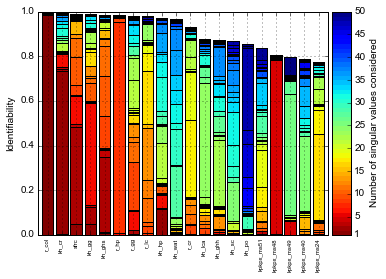

In [5]:
ip.plot_bar(nsingular=50)